In [ ]:
import pandas as pd

from sklearn.model_selection import train_test_split

from mlxtend.frequent_patterns import apriori, association_rules

data = pd.read_csv('/content/session_data.csv')
train_sessions, test_sessions = train_test_split(data['session_id'].unique(), test_size=0.2, random_state=42)

train_data = data[data['session_id'].isin(train_sessions)]
test_data = data[data['session_id'].isin(test_sessions)]





/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


session_id
0000bc46bf70d6ebb01c8b58f5e619ab    2
000163cb20c349ae5d6b9cd3343a221a    2
0001978dc214c82cb21a5a3d450ba431    2
0001c0bc9fcff00481a997d89de3d2e0    2
0002276867f6d276dc39a3261e30b2ca    2
Name: product_name, dtype: int64


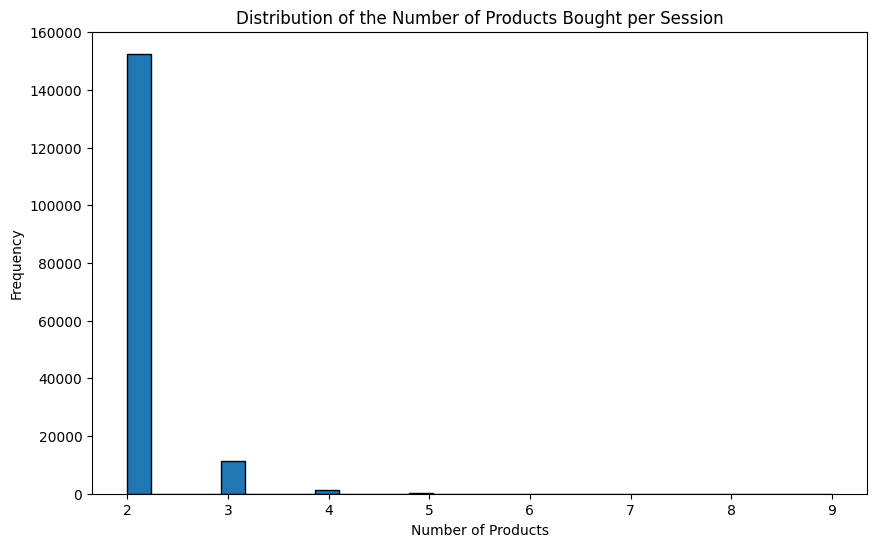

In [ ]:
import matplotlib.pyplot as plt


# Count the number of products bought in each session
session_product_counts = data.groupby('session_id')['product_name'].nunique()

print(session_product_counts.head())

# Plot the distribution of the number of products per session
plt.figure(figsize=(10, 6))
session_product_counts.plot(kind='hist', bins=30, edgecolor='k')
plt.title('Distribution of the Number of Products Bought per Session')
plt.xlabel('Number of Products')
plt.ylabel('Frequency')
plt.show()


In [ ]:


train_session_product_counts = train_data.groupby('session_id')['product_name'].nunique()
test_session_product_counts = test_data.groupby('session_id')['product_name'].nunique()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


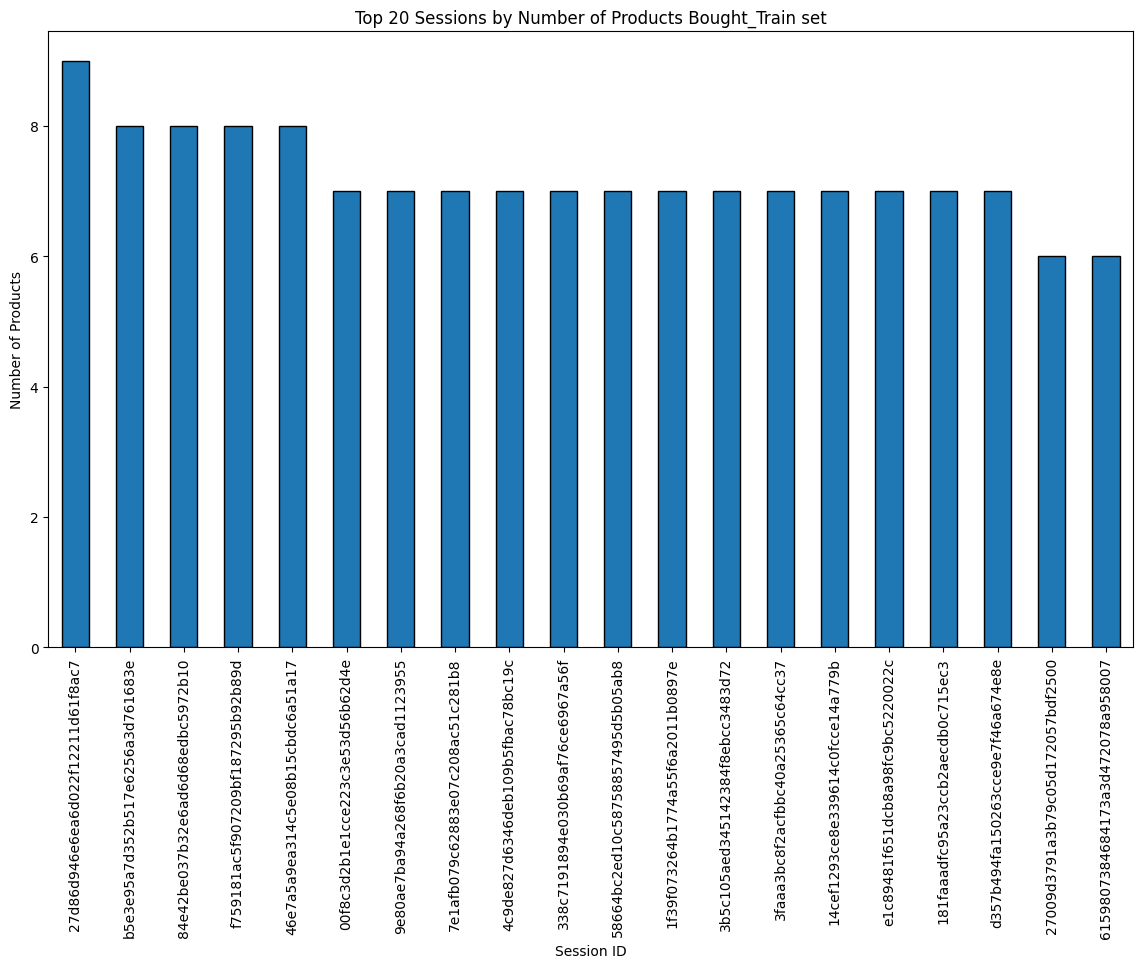

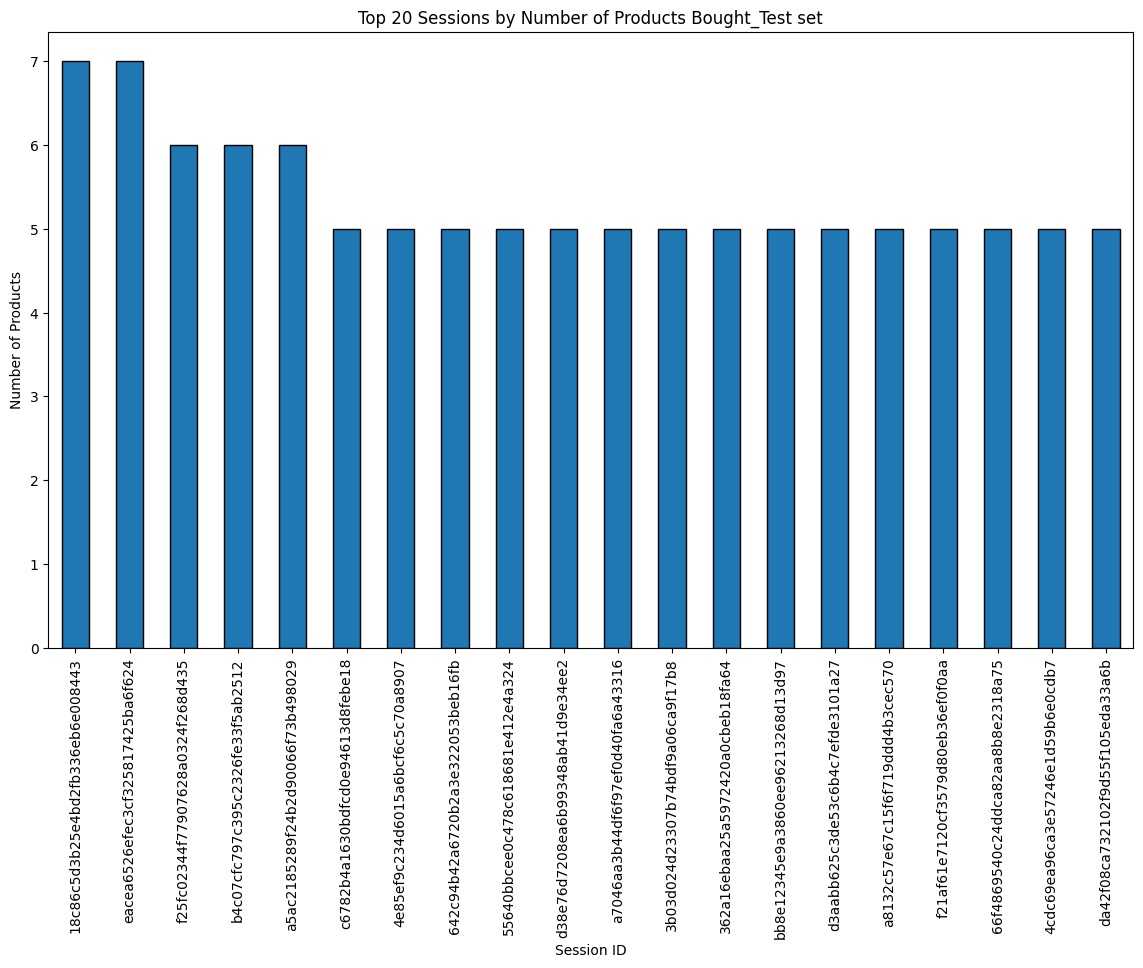

In [ ]:
# Sort by the number of products and select top N sessions
top_n = 20
top_sessions_train = train_session_product_counts.sort_values(ascending=False).head(top_n)
top_sessions_test = test_session_product_counts.sort_values(ascending=False).head(top_n)

plt.figure(figsize=(14, 8))
top_sessions_train.plot(kind='bar', edgecolor='k')
plt.title(f'Top {top_n} Sessions by Number of Products Bought_Train set')
plt.xlabel('Session ID')
plt.ylabel('Number of Products')
plt.show()

plt.figure(figsize=(14, 8))
top_sessions_test.plot(kind='bar', edgecolor='k')
plt.title(f'Top {top_n} Sessions by Number of Products Bought_Test set')
plt.xlabel('Session ID')
plt.ylabel('Number of Products')
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


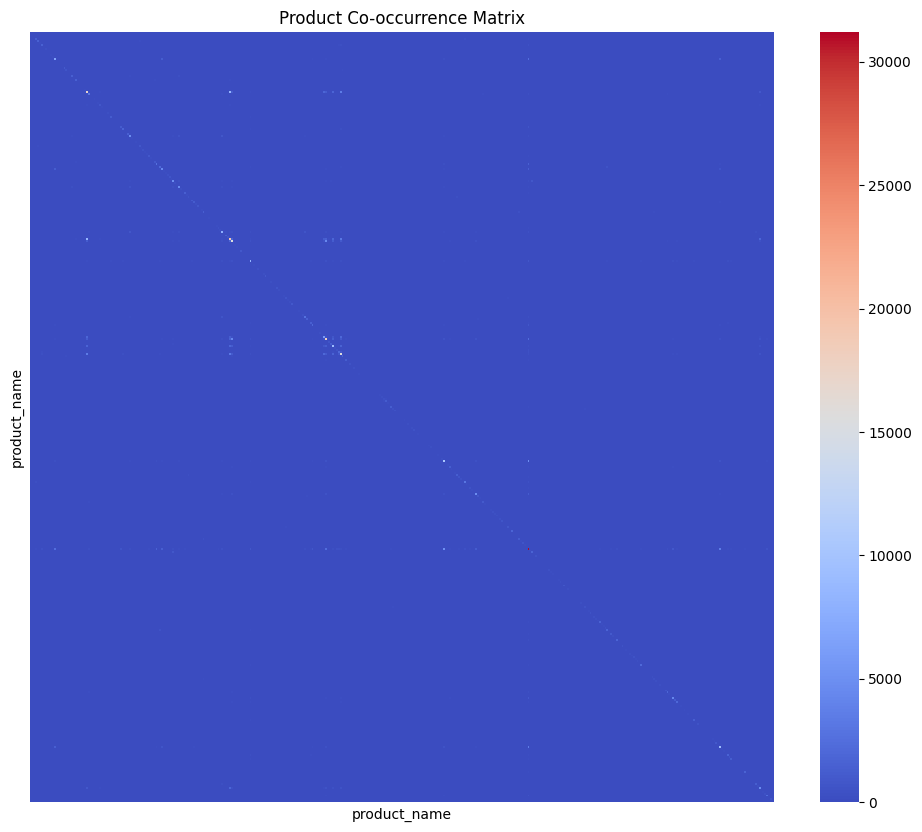

In [ ]:
import seaborn as sns

#Product co-occurrence matrix
co_occurrence_matrix = pd.crosstab(index=data['session_id'], columns=data['product_name'])
co_occurrence_matrix = co_occurrence_matrix.T.dot(co_occurrence_matrix)

plt.figure(figsize=(12, 10))
sns.heatmap(co_occurrence_matrix, cmap='coolwarm', xticklabels=False, yticklabels=False)
plt.title('Product Co-occurrence Matrix')
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


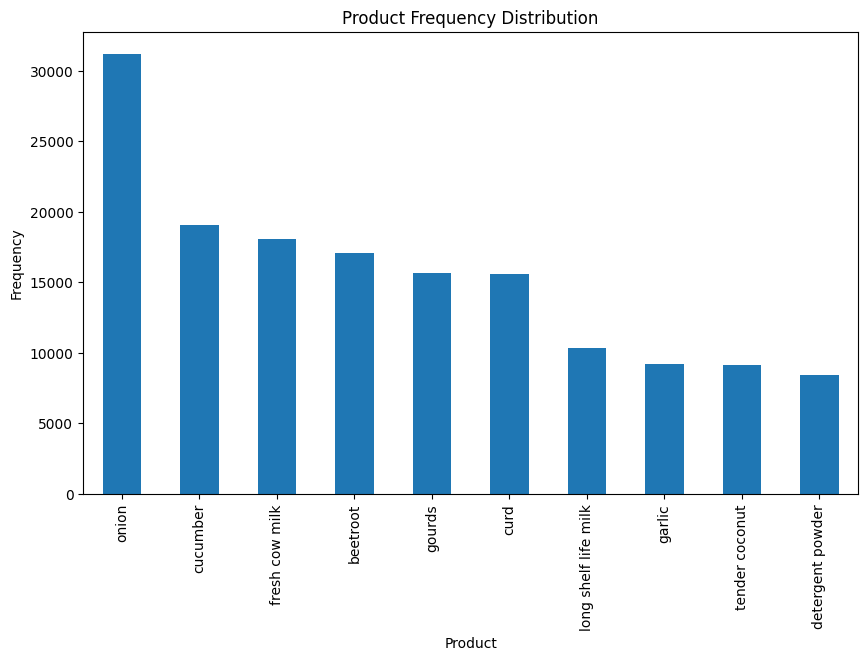

In [ ]:
import matplotlib.pyplot as plt

product_freq = data['product_name'].value_counts()
top_10_products = product_freq.head(10)


plt.figure(figsize=(10, 6))
top_10_products.plot(kind='bar')
plt.title('Product Frequency Distribution')
plt.xlabel('Product')
plt.ylabel('Frequency')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


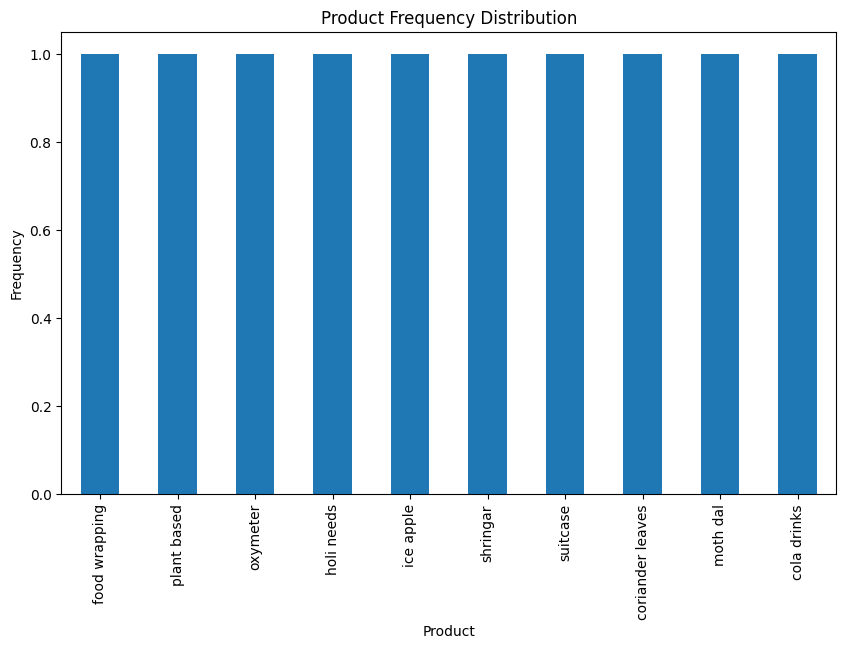

In [ ]:
import matplotlib.pyplot as plt

product_freq = data['product_name'].value_counts()
least_10_products = product_freq.tail(10)


plt.figure(figsize=(10, 6))
least_10_products.plot(kind='bar')
plt.title('Product Frequency Distribution')
plt.xlabel('Product')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Prepare the training data for the model
train_basket = (train_data.groupby(['session_id', 'product_name'])['product_name']
                .count().unstack().reset_index().fillna(0)
                .set_index('session_id'))

# Convert quantities to 0/1
train_basket = train_basket.applymap(lambda x: 1 if x > 0 else 0)

# Apply Apriori algorithm
frequent_itemsets = apriori(train_basket, min_support=0.01, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# Display the first few rules
print(rules.head())


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-53-942e0b5eeded>:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  train_basket = train_basket.applymap(lambda x: 1 if x > 0 else 0)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


     antecedents    consequents  antecedent support  consequent support  \
0  (baby fruits)        (onion)            0.040887            0.188821   
1        (onion)  (baby fruits)            0.188821            0.040887   
2     (beetroot)     (cucumber)            0.102542            0.115349   
3     (cucumber)     (beetroot)            0.115349            0.102542   
4  (fresh beans)     (beetroot)            0.034838            0.102542   

    support  confidence      lift  leverage  conviction  zhangs_metric  
0  0.015272    0.373521  1.978172  0.007552    1.294821       0.515562  
1  0.015272    0.080881  1.978172  0.007552    1.043514       0.609585  
2  0.051728    0.504461  4.373337  0.039900    1.785228       0.859474  
3  0.051728    0.448450  4.373337  0.039900    1.627156       0.871916  
4  0.011605    0.333116  3.248590  0.008033    1.345749       0.717159  


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


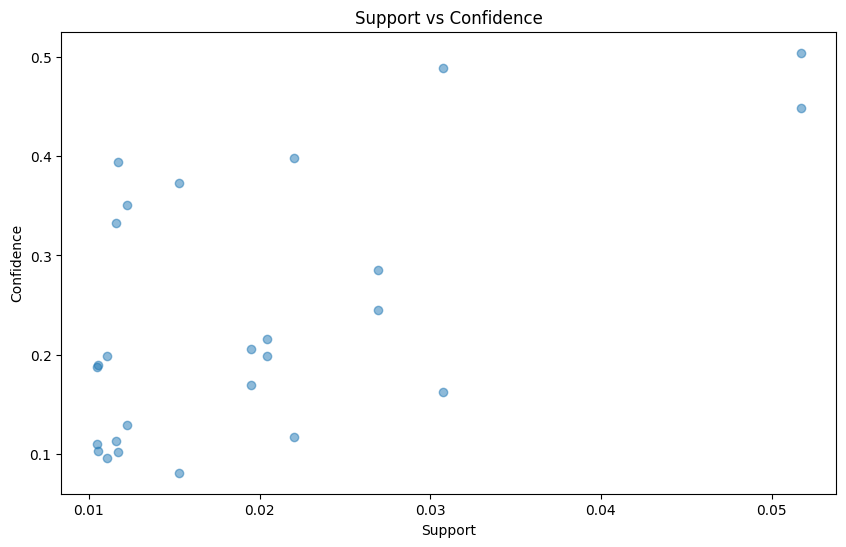

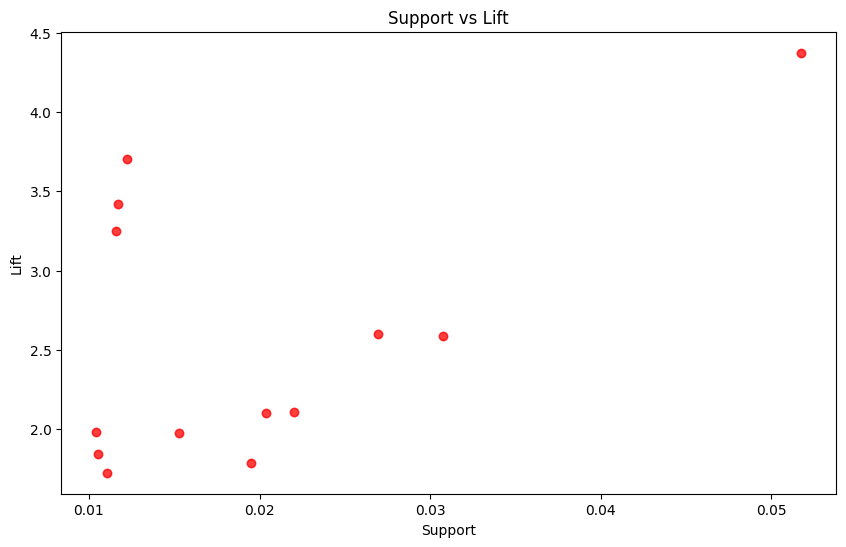

In [ ]:
# Assuming 'rules' DataFrame is already created

# Scatter plot of support vs confidence
plt.figure(figsize=(10, 6))
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.title('Support vs Confidence')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

# Scatter plot of support vs lift
plt.figure(figsize=(10, 6))
plt.scatter(rules['support'], rules['lift'], alpha=0.5, color='red')
plt.title('Support vs Lift')
plt.xlabel('Support')
plt.ylabel('Lift')
plt.show()


In [ ]:
train_basket

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


product_name,a2 ghee,adult diapers,adult nutrition,agarbatti & incense sticks,almond,almond milk,amaranthus,amchur powder,apple,artificial plants,...,wafer cubes,wafers,watermelon,wheat,wheat atta,white eggs,whole wheat breads,woks,yoghurt,zucchini
session_id,,,,,,,,,,,,,,,,,,,,,
0000bc46bf70d6ebb01c8b58f5e619ab,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0001978dc214c82cb21a5a3d450ba431,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0002276867f6d276dc39a3261e30b2ca,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0002a1009370d0d675e449a32f94f711,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0002e76e639563ab3a7c7cfca6033c07,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffed0f986ae3933f0830538adc37864,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
fffed3a44b22a0ad079f5ecf75c38e75,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ffffdfdb1e329a1ffde4f7eef3ff01d8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
def recommend_products(rules, products):
    recommendations = set()
    for product in products:
        consequent_rules = rules[rules['antecedents'].apply(lambda x: product in x)]
        for index, row in consequent_rules.iterrows():
            recommendations.update(row['consequents'])
    recommendations.difference_update(products)  # Remove already in-cart products
    return list(recommendations)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
current_cart = ['banana', 'onion']
recommended_products = recommend_products(rules, current_cart)
print(f"Recommended products: {recommended_products}")

Recommended products: ['baby fruits', 'long shelf life milk', 'tender coconut']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


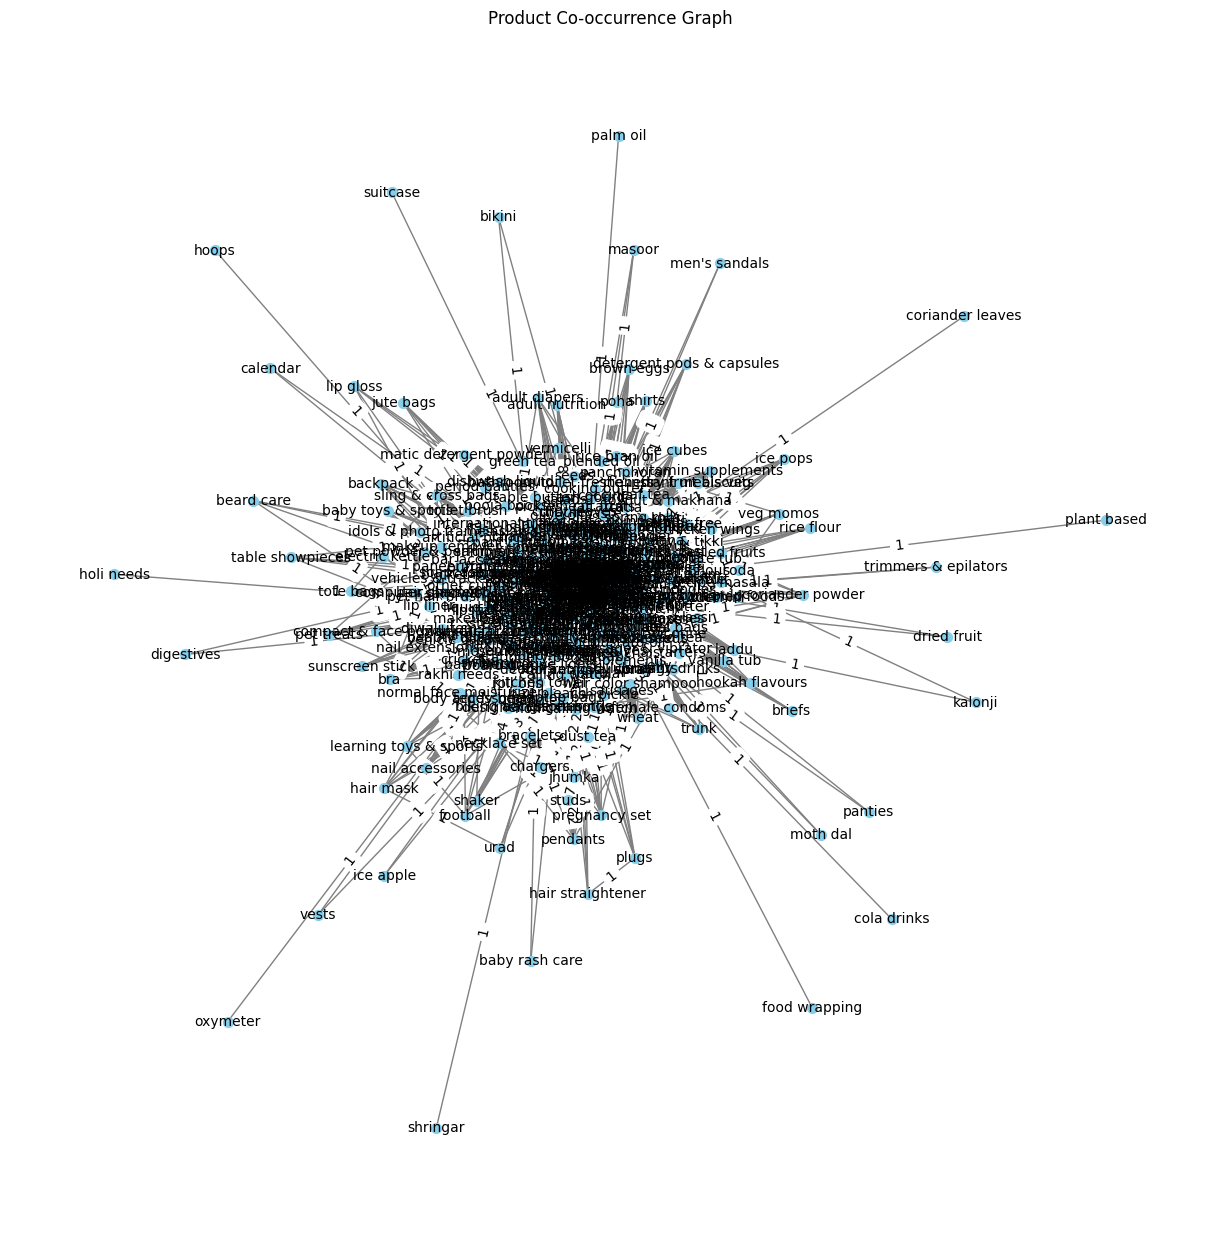

In [ ]:
import pandas as pd
import networkx as nx
from itertools import combinations
from collections import defaultdict
import matplotlib.pyplot as plt


co_occurrence = defaultdict(int)

for session_id, group in train_data.groupby('session_id'):
    products = group['product_name'].tolist()  # List of products in the current session
    for product_pair in combinations(products, 2):  # Generate all pairs of products
        co_occurrence[tuple(sorted(product_pair))] += 1  # Increment the co-occurrence count for the pair

G = nx.Graph()

# Add edges with weights based on co-occurrence counts
for (product1, product2), weight in co_occurrence.items():
    G.add_edge(product1, product2, weight=weight)

plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, k=0.1)  # Position the nodes using a spring layout
nx.draw(G, pos, with_labels=True, node_size=50, font_size=10, edge_color='gray', node_color='skyblue', font_color='black')

edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title('Product Co-occurrence Graph')
plt.show()




/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


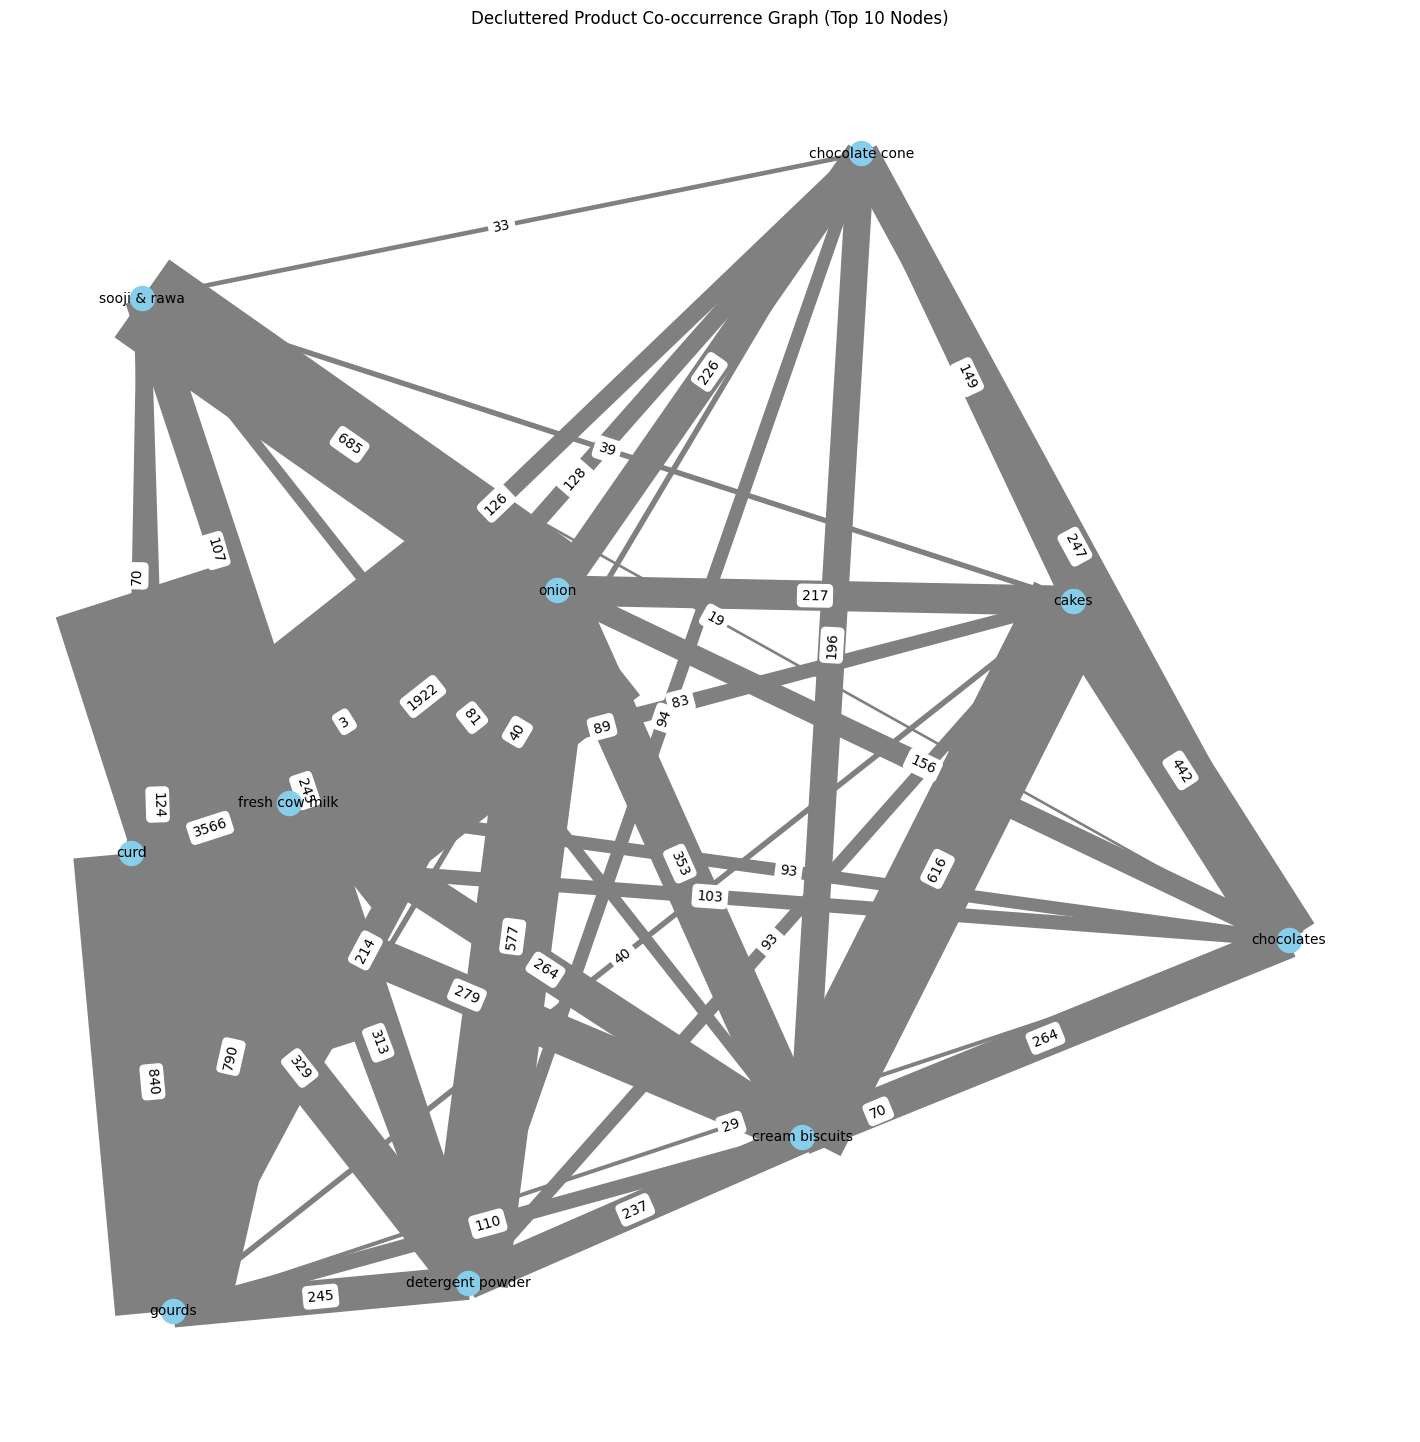

In [ ]:
#Top n subgraphs by degree
top_n = 10
top_nodes = sorted(G.degree, key=lambda x: x[1], reverse=True)[:top_n]
top_nodes = [node for node, degree in top_nodes]
H = G.subgraph(top_nodes)

plt.figure(figsize=(14, 14))
pos = nx.spring_layout(H, k=0.15)
nx.draw(H, pos, with_labels=True, node_size=300, font_size=10, edge_color='gray', node_color='skyblue', font_color='black', width=[d['weight']*0.1 for (u, v, d) in H.edges(data=True)])

edge_labels = nx.get_edge_attributes(H, 'weight')
filtered_edge_labels = {k: v for k, v in edge_labels.items() if v > 1}
nx.draw_networkx_edge_labels(H, pos, edge_labels=filtered_edge_labels)

plt.title(f'Decluttered Product Co-occurrence Graph (Top {top_n} Nodes)')
plt.show()


In [ ]:
import networkx as nx

def jaccard_recommendations(G, current_cart, top_n=10):
    neighbors = set()
    for product in current_cart:
        if product in G:
            neighbors.update(G.neighbors(product))

    recommendations = []
    for product in current_cart:
        if product in G:
            for neighbor in neighbors:
                if neighbor not in current_cart and neighbor in G:
                    jaccard_coeff = list(nx.jaccard_coefficient(G, [(product, neighbor)]))
                    if jaccard_coeff:
                        recommendations.append((neighbor, jaccard_coeff[0][2]))

    recommendations = sorted(recommendations, key=lambda x: x[1], reverse=True)
    recommended_products = [product for product, score in recommendations]
    return recommended_products[:top_n]


current_cart = ['banana', 'onion']
recommended_products = jaccard_recommendations(G, current_cart)
print(f"Recommended products: {recommended_products}")


Recommended products: ['curd', 'fresh cow milk', 'cucumber', 'long shelf life milk', 'gourds', 'beetroot', 'tender coconut', 'grapes', 'baby fruits', 'detergent powder']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
